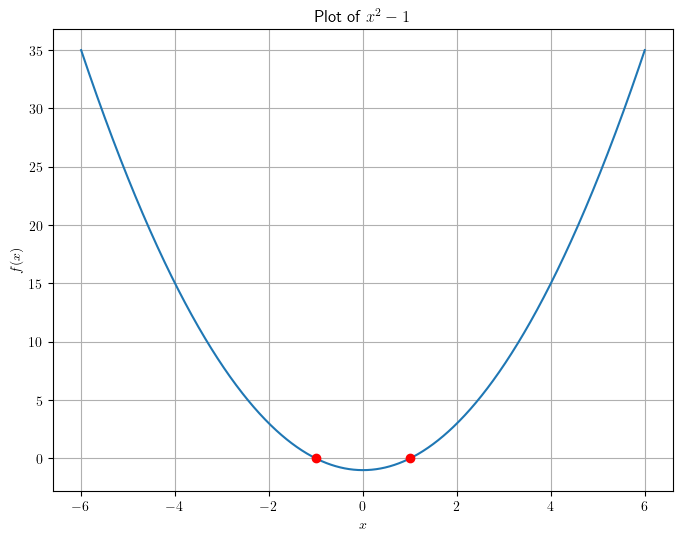

In [65]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = True

def formatQuadraticLatex(*coefs) -> str:
    """
    Formats and returns the LaTeX string containing a polynomial, specified with
    the provided coefficients.

    Params
    ------
    coefs: np.ndarray
        All the zero and nonzero coefficients specifying a polynomial.
        Note: (len(coefs) - 1) equals the degree of the polynomial, so make sure
        to provide all the coefficients.

    Returns
    -------
    LaTeX-formatted polynomial with the specified coefficients, where
    all zero coefficients are removed and all coeffiecients equal to one
    are not displayed (but their x^n is displayed).

    Example
        coefs = [1, 0, -1]    => "x^2 - 1"
        coefs = [-2, 0, 1, 2] => "-2x^3 + x + 2"
    """

    polynomial_degree = len(coefs) - 1
    
    # this list contains terms in the format ("sign", "|term|")
    # Examples:
    # * Terms do not have the highest degree, thus they reside inside the polynomial
    #     -3x^2 is stored as ("-", "3x^2")
    #      4x^7 is stored as ("+", "4x^7")
    # * Terms have the highest degree, thus they are the first terms in the polynomial
    #     -3x^2 is stored as ("-", "3x^2")
    #      4x^7 is stored as ("", "4x^7")
    separate_terms: list[tuple[str, str]] = []
    for i, coef in enumerate(coefs):
        degree = polynomial_degree - i

        # skip zero terms
        if coef == 0:
            continue

        sign = '-' if coef < 0 else ('' if i == 0 else '+')
        term_without_coef = "" if degree == 0 else ("x" if degree == 1 else f"x^{degree}")
        term = f"{np.abs(coef)}{term_without_coef}" if coef != 1 else (f"{coef}" if term_without_coef == "" else term_without_coef)
        separate_terms.append((sign, term))
               
    # join separate terms into a LaTeX string
    result = ""
    for sign, term in separate_terms:
        result += f"{sign}{term}"

    return result

def f(a: np.float64, b: np.float64, c: np.float64):
    r""" 
    - Plots the quadratic function $f(x) = ax^2 + bx + c$.
    - If applicable, it marks the zero(s) with a red dot. 

    Params
    ------
    (a, b, c): float
        The coefficients of the quadratic equation with a corresponding to x^2,
        b to x, and c to the constant term.
        If a is 0, then the equations is not quadratic, and therefore the function
        does nothing.
    """

    if a == 0:
        print("Provide a quadratic equation.")

    quadratic_formula = lambda x: a * x * x + b * x + c

    # find vertex
    vertex_x = -b / (2 * a)
    vertex_y = quadratic_formula(vertex_x)

    # find unique real roots
    roots = np.roots([a, b, c])
    roots = np.unique(roots[np.isreal(roots)].real)

    # adjust the x axis domain by:
    # min_x := minimum(...roots, vertex_x)
    # max_x := maximum(...roots, vertex_x)
    ACCURACY = 1000
    min_x = np.min([vertex_x, np.min(roots)]) - 5 if roots.size > 0 else vertex_x - 5
    max_x = np.max([vertex_x, np.max(roots)]) + 5 if roots.size > 0 else vertex_x + 5
    x = np.linspace(min_x, max_x, ACCURACY)    
    y = quadratic_formula(x)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()

    # plot the quadratic function
    ax.plot(x, y, zorder=2)

    # plot the roots
    if roots.size > 0:
        ax.scatter(roots, np.zeros(roots.shape), color='red', marker='o', zorder=3)

    ax.grid()
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$f(x)$")
    ax.set_title(rf"Plot of ${formatQuadraticLatex(a, b, c)}$")
    
    plt.show()

f(1, 0, -1)